# Table of Contents
 <p><div class="lev1"><a href="#Bad-vs.-Good-Visualization"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bad vs. Good Visualization</a></div><div class="lev2"><a href="#Bar-charts"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bar charts</a></div><div class="lev2"><a href="#World-maps-in-R"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>World maps in R</a></div><div class="lev2"><a href="#Line-charts"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Line charts</a></div>

Bad vs. Good Visualization
==========================

## Bar charts

In [1]:
library(ggplot2)

In [7]:
intl <- read.csv("intl.csv")

In [4]:
str(intl)

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Africa","Asia",..: 2 3 6 4 5 1 7 8
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


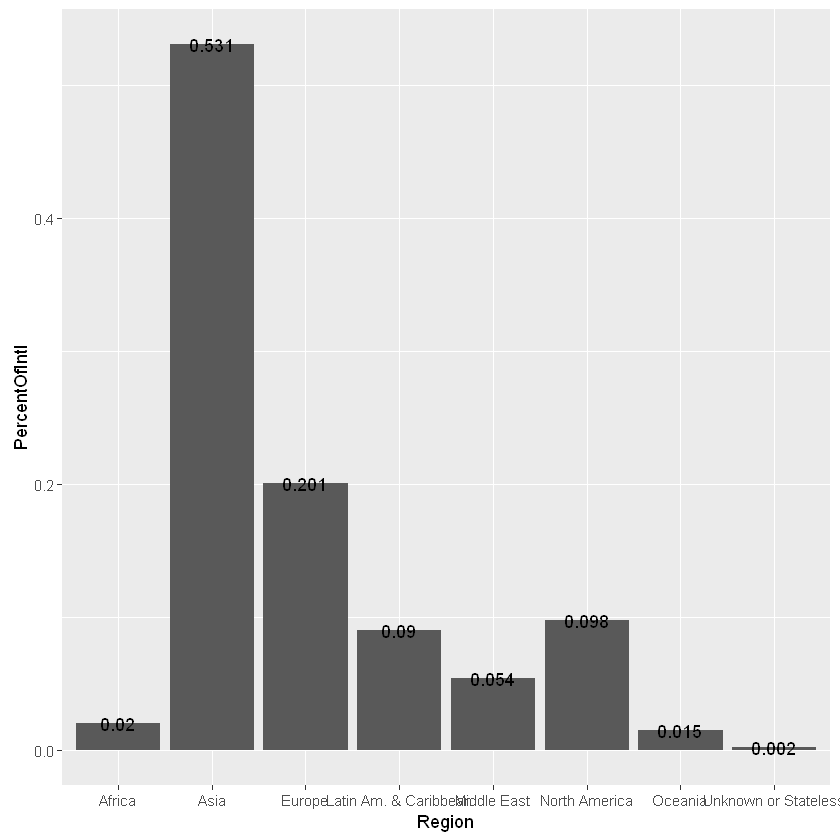

In [5]:
ggplot(intl, aes(x=Region, y=PercentOfIntl)) +
geom_bar(stat="identity") +
geom_text(aes(label=PercentOfIntl))

In [8]:
intl <- transform(intl, Region=reorder(Region, -PercentOfIntl))
str(intl)

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Asia","Europe",..: 1 2 3 4 5 6 7 8
  ..- attr(*, "scores")= num [1:8(1d)] -0.02 -0.531 -0.201 -0.09 -0.054 -0.098 -0.015 -0.002
  .. ..- attr(*, "dimnames")=List of 1
  .. .. ..$ : chr  "Africa" "Asia" "Europe" "Latin Am. & Caribbean" ...
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


In [9]:
intl$PercentOfIntl <- intl$PercentOfIntl * 100

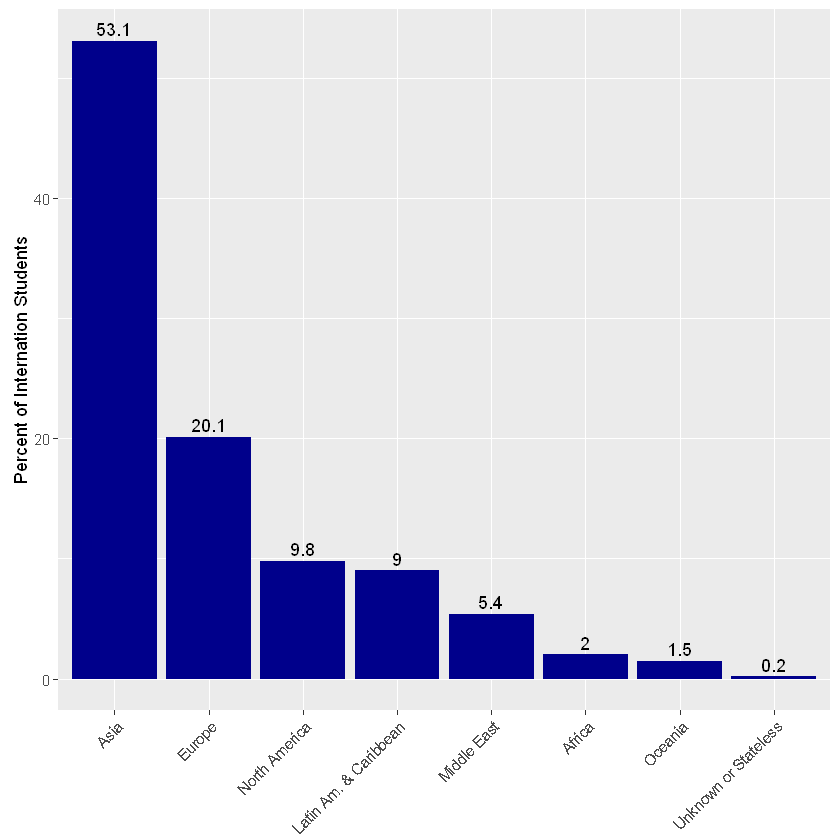

In [12]:
ggplot(intl, aes(x=Region, y=PercentOfIntl)) +
geom_bar(stat="identity", fill="darkblue") +
geom_text(aes(label=PercentOfIntl), vjust=-.4) +
ylab("Percent of Internation Students") +
theme(
    axis.title.x=element_blank(),
    axis.text.x=element_text(angle=45, hjust=1)
)

## World maps in R

In [13]:
library(ggmap)

In [17]:
intlall <- read.csv("intlall.csv", stringsAsFactors=FALSE)

In [18]:
str(intlall)

'data.frame':	114 obs. of  7 variables:
 $ Citizenship    : chr  "Albania" "Antigua and Barbuda" "Argentina" "Armenia" ...
 $ UG             : int  3 NA NA 3 6 NA 2 3 1 1 ...
 $ G              : int  1 NA 19 2 32 11 NA 7 NA 8 ...
 $ SpecialUG      : int  0 NA NA NA NA NA NA NA NA NA ...
 $ SpecialG       : int  0 1 NA NA NA NA NA NA NA NA ...
 $ ExhangeVisiting: int  0 NA NA NA 1 5 NA NA NA 7 ...
 $ Total          : int  4 1 19 5 39 16 2 10 1 16 ...


In [19]:
head(intlall)

,Citizenship,UG,G,SpecialUG,SpecialG,ExhangeVisiting,Total
1,Albania,3,1,0,0,0,4
2,Antigua and Barbuda,NA,NA,NA,1,NA,1
3,Argentina,NA,19,NA,NA,NA,19
4,Armenia,3,2,NA,NA,NA,5
5,Australia,6,32,NA,NA,1,39
6,Austria,NA,11,NA,NA,5,16


In [20]:
intlall[is.na(intlall)] = 0

In [21]:
head(intlall)

,Citizenship,UG,G,SpecialUG,SpecialG,ExhangeVisiting,Total
1,Albania,3,1,0,0,0,4
2,Antigua and Barbuda,0,0,0,1,0,1
3,Argentina,0,19,0,0,0,19
4,Armenia,3,2,0,0,0,5
5,Australia,6,32,0,0,1,39
6,Austria,0,11,0,0,5,16


In [22]:
world_map <- map_data("world")
str(world_map)

'data.frame':	99338 obs. of  6 variables:
 $ long     : num  -69.9 -69.9 -69.9 -70 -70.1 ...
 $ lat      : num  12.5 12.4 12.4 12.5 12.5 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "Aruba" "Aruba" "Aruba" "Aruba" ...
 $ subregion: chr  NA NA NA NA ...


In [24]:
world_map <- merge(world_map, intlall, by.x="region", by.y="Citizenship")

In [26]:
str(world_map)

'data.frame':	63634 obs. of  12 variables:
 $ region         : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ long           : num  20.5 20.4 19.5 20.5 20.4 ...
 $ lat            : num  41.3 39.8 42.5 40.1 41.5 ...
 $ group          : num  6 6 6 6 6 6 6 6 6 6 ...
 $ order          : int  789 822 870 815 786 821 818 779 879 795 ...
 $ subregion      : chr  NA NA NA NA ...
 $ UG             : num  3 3 3 3 3 3 3 3 3 3 ...
 $ G              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ SpecialUG      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialG       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ExhangeVisiting: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Total          : int  4 4 4 4 4 4 4 4 4 4 ...


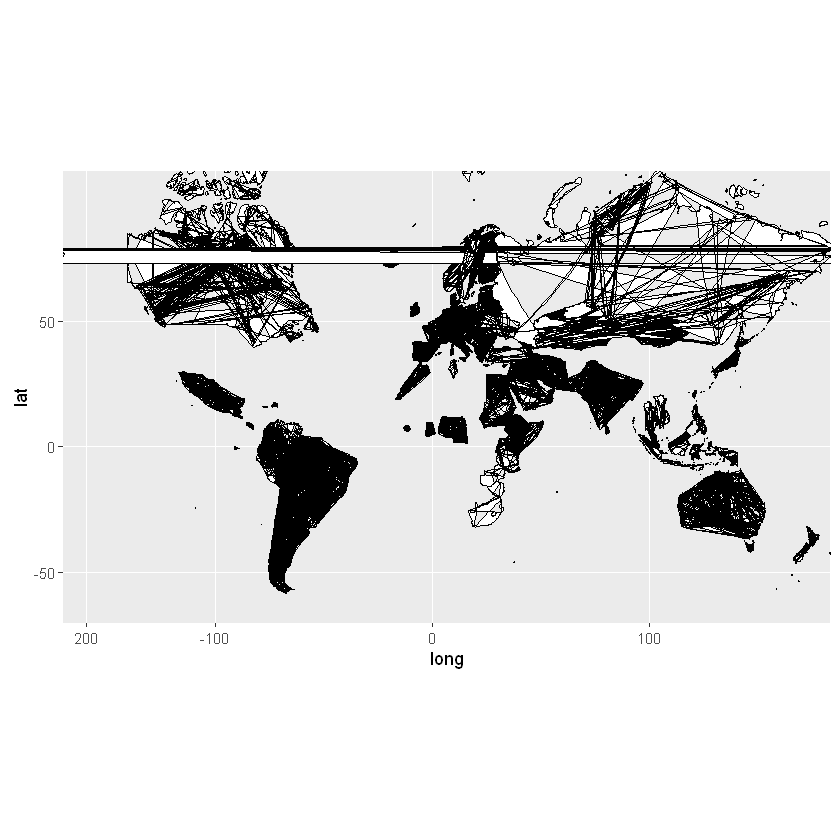

In [27]:
ggplot(world_map, aes(x=long, y=lat, group=group)) +
geom_polygon(fill="white", color="black") +
coord_map("mercator")

In [28]:
world_map <- world_map[order(world_map$group, world_map$order),]

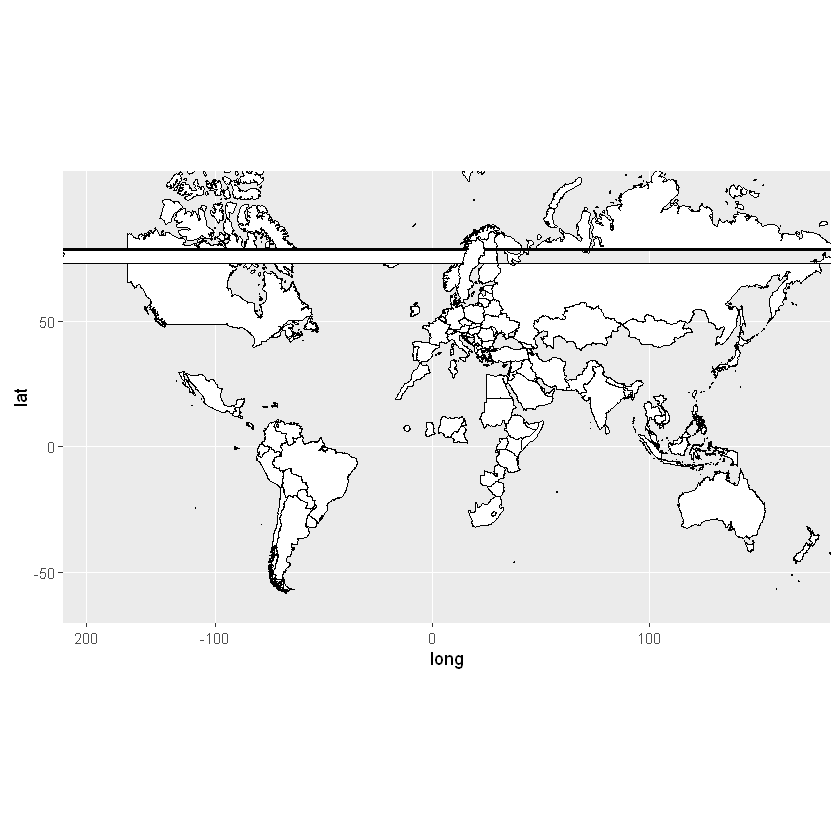

In [39]:
ggplot(world_map, aes(x=long, y=lat, group=group)) +
geom_polygon(fill="white", color="black") +
coord_map("mercator")

In [38]:
table(intlall$Citizenship)


                     Albania          Antigua and Barbuda 
                           1                            1 
                   Argentina                      Armenia 
                           1                            1 
                   Australia                      Austria 
                           1                            1 
                     Bahrain                   Bangladesh 
                           1                            1 
                     Belarus                      Belgium 
                           1                            1 
                     Bolivia           Bosnia-Hercegovina 
                           1                            1 
                      Brazil                     Bulgaria 
                           1                            1 
                    Cambodia                     Cameroon 
                           1                            1 
                      Canada                        Chi

In [31]:
table(world_map$region)


             Albania            Argentina              Armenia 
                 113                 1039                  146 
           Australia              Austria              Bahrain 
                1804                  272                   13 
          Bangladesh              Belarus              Belgium 
                 384                  321                  163 
             Bolivia               Brazil             Bulgaria 
                 418                 1885                  179 
            Cambodia             Cameroon               Canada 
                 221                  350                11573 
               Chile             Colombia           Costa Rica 
                2006                  623                  133 
             Croatia               Cyprus       Czech Republic 
                 374                  100                  240 
             Denmark              Ecuador                Egypt 
                 298                  3

In [37]:
intlall$Citizenship[intlall$Citizenship == "China (People's Republic Of)"] = "China"

In [45]:
world_map <- merge(map_data("world"), intlall, by.x="region", by.y="Citizenship")

In [46]:
world_map <- world_map[order(world_map$group, world_map$order),]

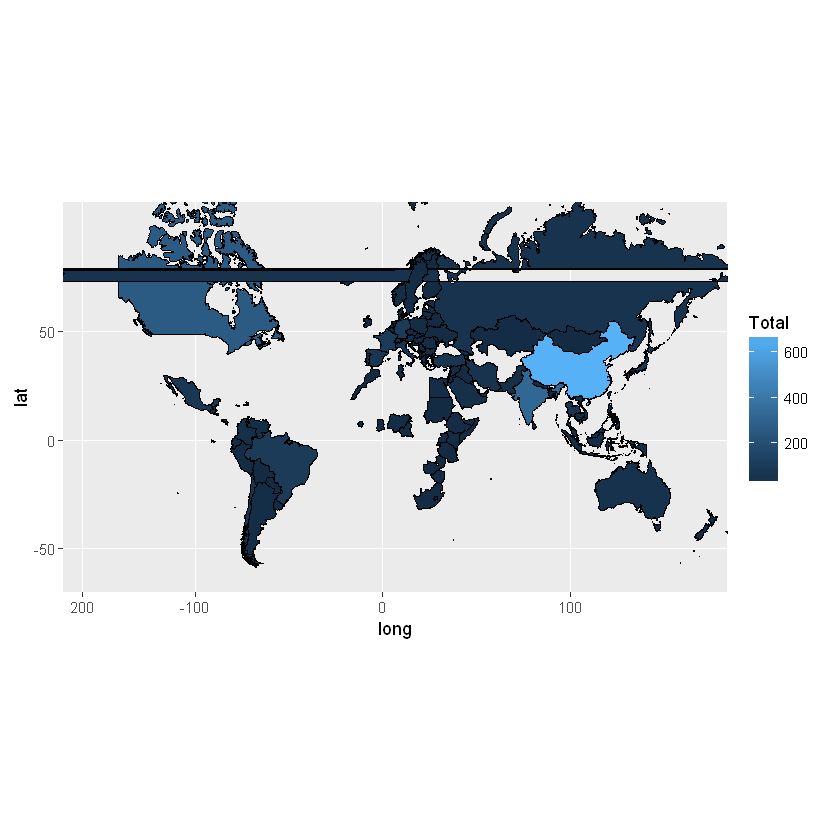

In [49]:
ggplot(world_map, aes(x=long, y=lat, group=group)) +
geom_polygon(aes(fill=Total), color="black") +
coord_map("mercator")

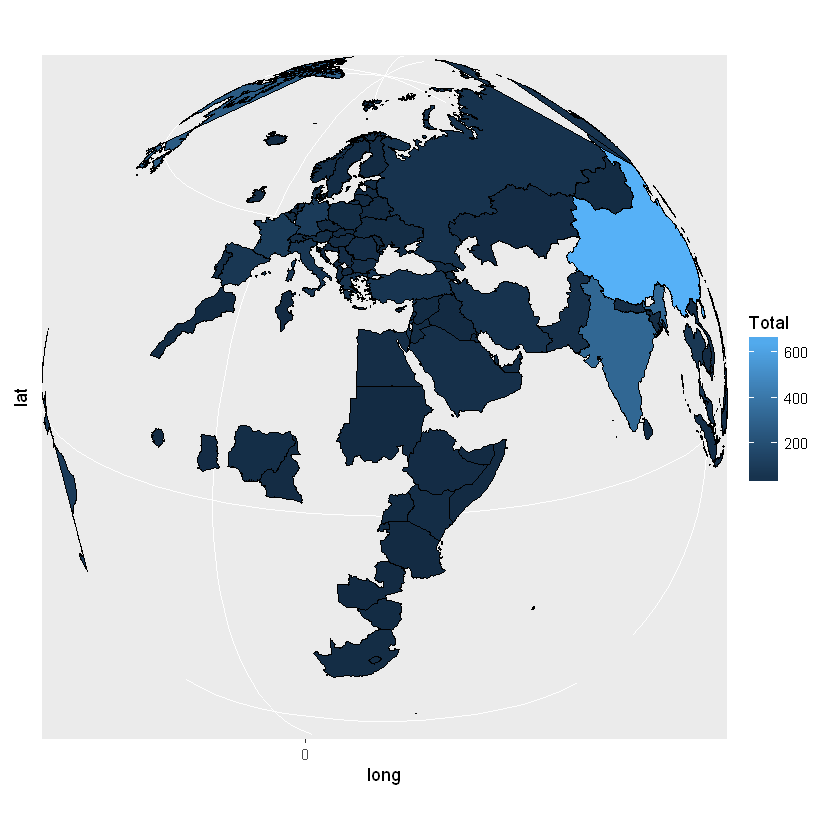

In [50]:
ggplot(world_map, aes(x=long, y=lat, group=group)) +
geom_polygon(aes(fill=Total), color="black") +
coord_map("ortho", orientation=c(20, 30, 0))

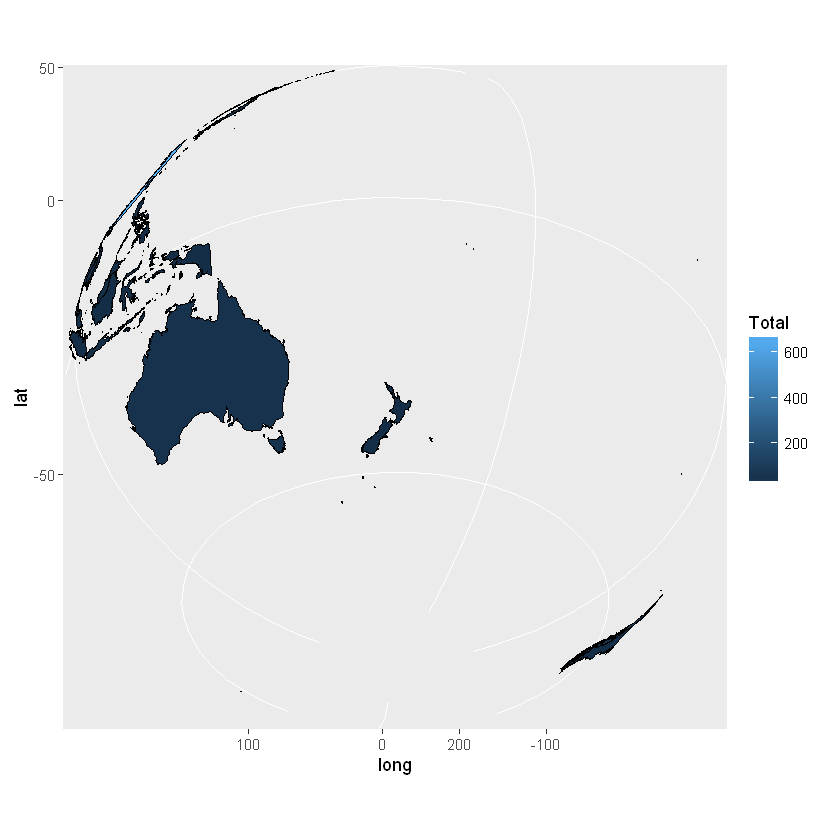

In [51]:
ggplot(world_map, aes(x=long, y=lat, group=group)) +
geom_polygon(aes(fill=Total), color="black") +
coord_map("ortho", orientation=c(-37, 175, 0))

## Line charts

In [52]:
library(ggplot2)

In [53]:
households <- read.csv("households.csv")

In [54]:
str(households)

'data.frame':	8 obs. of  7 variables:
 $ Year          : int  1970 1980 1990 1995 2000 2005 2010 2012
 $ MarriedWChild : num  40.3 30.9 26.3 25.5 24.1 22.9 20.9 19.6
 $ MarriedWOChild: num  30.3 29.9 29.8 28.9 28.7 28.3 28.8 29.1
 $ OtherFamily   : num  10.6 12.9 14.8 15.6 16 16.7 17.4 17.8
 $ MenAlone      : num  5.6 8.6 9.7 10.2 10.7 11.3 11.9 12.3
 $ WomenAlone    : num  11.5 14 14.9 14.7 14.8 15.3 14.8 15.2
 $ OtherNonfamily: num  1.7 3.6 4.6 5 5.7 5.6 6.2 6.1


In [55]:
library(reshape2)

In [56]:
households[,1:2]

,Year,MarriedWChild
1,1970.0,40.3
2,1980.0,30.9
3,1990.0,26.3
4,1995.0,25.5
5,2000.0,24.1
6,2005.0,22.9
7,2010.0,20.9
8,2012.0,19.6


In [57]:
head(melt(households, id="Year"))

,Year,variable,value
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9


In [58]:
households[,1:3]

,Year,MarriedWChild,MarriedWOChild
1,1970.0,40.3,30.3
2,1980.0,30.9,29.9
3,1990.0,26.3,29.8
4,1995.0,25.5,28.9
5,2000.0,24.1,28.7
6,2005.0,22.9,28.3
7,2010.0,20.9,28.8
8,2012.0,19.6,29.1


In [59]:
melt(households, id="Year")[1:10,]

,Year,variable,value
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9
7,2010,MarriedWChild,20.9
8,2012,MarriedWChild,19.6
9,1970,MarriedWOChild,30.3
10,1980,MarriedWOChild,29.9


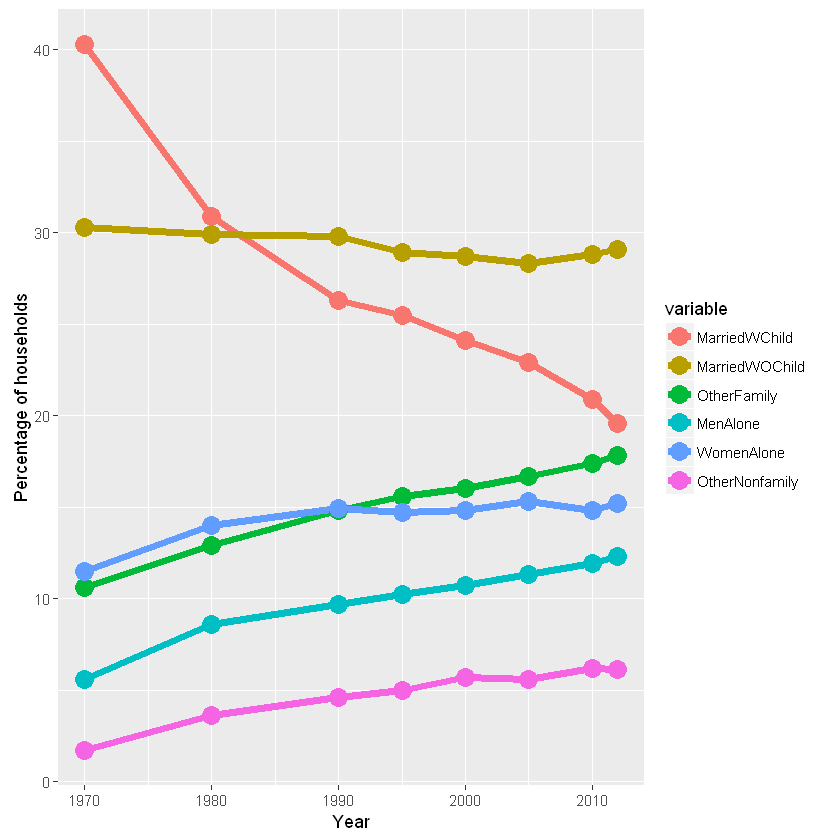

In [61]:
ggplot(melt(households, id="Year"), aes(x=Year, y=value, color=variable)) +
geom_line(size=2) +
geom_point(size=5) +
ylab("Percentage of households")